# <center style="font-size:140%;"> Report - Project #*2*: Perfectly Stirred Reactor

<center>
<span style="font-size:160%;">McGill University, Montreal </span> <br>
MECH(447|652) - Dynamics of Combustion <br>
Project #2
</center>

<center>Submitted to: 
<center>Gilles Bourque
<center>by
<center>Pierrick Hamard (260619897)

<center>November 7th 2019
<center>Montreal, Quebec, Canada

# Table of Contents:

* [Introduction](#Introduction)


* [Part 1: RQL Combuster - Preliminary Calculations](#Section1) 
    * [1.1 - Fuel Mass Flow Rate and Overall Equivalence Ratio](#Section1_1)
    * [1.2 - Equilibrium Flame Temperature and Molar Composition of $CO, NO$](#Section1_2)
    * [1.3 - Simulating the Combustor using a Perfectly Stirred Reactor + Residence Time](#Section1_3)
    * [1.4 - Comparing PSR Temperature and Concentration Values of CO, NO with Equilibrium Values](#Section1_4)
    * [1.5 - Bonus Question](#Section1_5)
    
    
* [Part 2: RQL Combuster - Reactor Network Modeling](#Section2)
    * [2.1 - Varying the Equivalence Ratio of the Rich-Burn PSR](#Section2_1)
    * [2.2 - Range of Equivalence Ratio for NO and CO to be below 25 vppm](#Section2_2)
    * [2.3 - Comparing Pollutant Emissions in Different Reactors](#Section2_3)
    * [2.4 - Bonus Question](#Section2_4)  


* [Part 3: Fire Hazard Assessment: Fuel Leak](#Section3)
    * [3.1 - Possibility of a Fire](#Section3_1)
    * [3.2 - Autoignition Delay vs. 1000/T](#Section3_2)
       * [3.2.1 - OH Radical Marker for Autoignition Delay](#Section3_2_1)
    * [3.3 - Minimum Flow Rate Required to Prevent Fire](#Section3_3)
    
    
* [Conclusion](#Conclusion)


<a id='Introduction'><a>

# Introduction:

Land-based gas turbines are used for a variety of applications including electricity production and natural gas/oil pressurization in pipelines. Two types exist: aero-derivative and heavy frame. The former consists of an aircraft engine modified (mostly the combustor) to burn gaseous fuels like natural gas. As such, aero-derivative GT operate at high compression ratios (25-50 atm). The latter are gas turbines designed from scratch for land-based applications, generally larger than aero-derivative ones (in terms of size and power output), and operate at lower compression ratios (10-25 atm).

In this project, pollutant emissions (carbon monoxide $\left(CO\right)$, nitrogen monoxide $\left(NO\right)$ and unburned hydrocarbon $\left(UHC\right)$) will be investigated and compared for three types of reactors: Equilibrium Reactor (preliminary calculations), Perfectly Stirred Reactor (PSR), and Rich-burn, Quick-quench, Lean-burn Reactors (RQL). In addition an assessment of autoignition delays and probabilities will be investigated via various scenarios when there is a gas leak present in a confined space. 

**Basic packages required for labs**

The Python kernel is initialized for Cantera, Numpy, MatplotLib and others with the commands below.

In [27]:
from __future__ import division
from __future__ import print_function

%matplotlib inline
import cantera as ct 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

ct.suppress_thermo_warnings()

<br>
<a id='Section1'><a>
<br>

# Part 1 - RQL Combustor: Preliminary Calculations


  In industry, the design of a new combustor often starts with first estimations obtained from 0D reactors as perfectly stirred reactors, PSR. The goal is to find the best configuration to reduce pollutant formation (e.g. $NO_x$, $CO$, unburned hydrocarbons $(UHC)$, etc.). This section will discuss the effect of staging the air admission in the combustor on the pollutant emissions. An aero-derivative gas turbine with an efficiency of 46% and a power output of 150 MW at full load conditions will be considered. The total air flow rate, fixed by the compressor at 240 kg/s, enters the 0.4 $m^3$ combustor operating at 30 atm at a temperature of 800K.

<a id='Section1_1'><a>

## 1.1 - Fuel Mass Flow Rate and Overall Equivalence Ratio

<br>
Recall, the initial conditions are given to be: <br>
* Gas turbine efficiency: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\eta$ = 46% <br>
* Power output:           $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\dot W$ = 150 MW <br>
* Total air flow rate:    $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\dot m_{air}$ = 240 kg/s <br>
* Volume of combustor:    $\;\;\;\;\;\;\;\;\;\;\;\;\;Vol$ = 0.40 $m^3$ <br>
* Heating value:          $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;q$ = 50 MJ/kg <br>
* Methane assumed at full load
<br>
<br>


 The mass flow rate of the fuel, in this case methane $\left(\dot{m}_{CH_4}\right)$ can be found using the power output $\left(\dot{W}\right)$ of the reactor, its efficiency $\left(\eta\right)$, and the heating value of the fuel $\left(q\right)$, as follows:

\begin{equation}
\dot{m}_{CH_4} = \frac{\dot{W}}{\eta q} = \frac{150}{0.46\times50}  = \boxed{6.522\ kg/s}.
\end{equation}

 The fuel to oxidizer ratio $F\big/A$ can then be expressed as:

\begin{equation}
\frac{F}{A} = \frac{\dot{m}_{CH_4}}{\dot{m}_{air}} =  \frac{6.522}{240} = 0.0272.
\end{equation}

<br>
The stoichiometric fuel to oxidizer ratio can be found from the stoichiometric equation of complete combustion of methane:

\begin{equation}
CH_4 + 2\left(O_2 + 3.76N_2\right) \rightarrow CO_2 + 2H_2O + 2(3.76)N_2
\end{equation}

Thus:
\begin{equation}
\left(\frac{F}{A}\right)_{stoich} = \frac{N_{CH_4}\times\left(MW_{CH_4}\right)}{N_{air}\times\left(MW_{air}\right)} = \frac{1\,(16.04)}{2\,(16\times2\,+\,3.76\times2\times14)} = 0.05842
\end{equation}
<br>
where the molecular weights of methane and air are $\;MW_{CH_4} = 16.04 \ g/mol\;$ and $\;MW_{air} = 28.84 \ g/mol\;$ respectively. <br>
Moreover, $N_{CH_4}$ and $N_{air}$ are the number of moles of methane and air respectively. 

The overall equivalence ratio is thus:
\begin{equation}
\phi = \frac{\left( F\big/ A\right)}{\;\left( F\big/ A\right)_{stoich}} = \frac{0.0272}{0.05842} = \boxed{\,0.4656\;}.
\end{equation}


<br>
<a id='Section1_2'><a>

## 1.2 - Equilibrium Flame Temperature and Mole Fractions of $CO$ and $NO$ 

<br>

The equilibrium flame temperature and the mole fractions of $CO$ and $NO$ will be computed for the following conditions:

* Flow rate of air: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\dot m_{air}$ = 240 kg/s
* Flow rate of fuel ($CH_4$): $\;\;\;\;\;\;\;\;\;\;\;\,\dot m_{CH_4}$ = 6.522 kg/s
* Volume of combustor: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\,\,Vol$ = 0.40 $m^3$
* Pressure: $\;\;\;\;\;\;\;\;\;\;\;\;\,\,\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\,\;P$ = 30 atm
* Temperature: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\,\,\;\;\;\;\;\;\;\;\;\;\;\;T$ = 800 K

In [215]:
# Define Variables:

MW_air = 28.84                                   # g/mol
MW_CH4 = 16.04                                   # g/mol
Power = 150                                      # MW
Efficiency = 0.46
Q = 50                                           # MJ/kg
Flowrate_air = 240                                # kg/s.
Flowrate_CH4 = Power/(Efficiency*Q)              # kg/s
F_A_stoich = (1*MW_CH4)/(2*4.76*MW_air)          # Stoichiometric fuel to air ratio.
phi = (Flowrate_CH4/Flowrate_air)/F_A_stoich     # Equivalence Ratio

print(Flowrate_CH4)
print(F_A_stoich)
print(phi)

6.521739130434782
0.058421426823156444
0.46513607286132497


In [10]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}

# Create an IdealGas object with species representing complete combustion
complete_species = [species[S] for S in ('CH4','CO','NO')]

# Create an IdealGas object including incomplete combustion species
gas1 = ct.Solution(thermo='IdealGas', species=species.values())
gas1.TPX = 800, 30*ct.one_atm, 'CH4:%5.6f, O2:2, N2:7.52' % phi
gas1.equilibrate('HP') # Constant pressure, addiabatic process.
T_eq = gas1.T
X_CO_eq = gas1['CO'].X[0]
X_NO_eq = gas1['NO'].X[0]

print('\nThe Equilibrium Flame Temperature is:       {:.2f} K '.format(T_eq))
print('\nThe Equilibrium Mole Fraction of CO is:     [{:.7f}] '.format(X_CO_eq),'       i.e.  Concentration of CO   =   {:.1f} vppm'.format(X_CO_eq*1e6))
print('The Equilibrium Mole Fraction of NO is:     [{:.7f}] '.format(X_NO_eq),'       i.e.  Concentration of NO   =   {:.1f} vppm'.format(X_NO_eq*1e6))

 


The Equilibrium Flame Temperature is:       1819.39 K 

The Equilibrium Mole Fraction of CO is:     [0.0000066]         i.e.  Concentration of CO   =   6.6 vppm
The Equilibrium Mole Fraction of NO is:     [0.0030834]         i.e.  Concentration of NO   =   3083.4 vppm


<br>
<a id='Section1_3'><a>

## 1.3 - Simulating the Combustor using a Perfectly Stirred Reactor (Residence Time)

<br>

The combustor will be simulated using a PSR with the conditions cited above in Section 1.2. 
<br>

In a PSR, two reservoirs will be created; one for the fuel (CH4) inlet, and the other for the oxidizer (air) inlet. Chemical models will be defined for both the fuel and the oxidizer, and the given conditions (P, T, and composition) will be specified for each. There is a third reservoir that needs to be created; this one acts as the exhaust. It should be noted that the same 'gas' which was previously reacted in the combustor will enter the exhaust reservoir.
<br>

Additionally, the direction of the flow and the amount of the flow that is flowing between the reservoirs and the reactor will need to be specified. This will be done using mass flow controllers: $"m1"$ for the fuel and $"m2"$ for the air. The *"MassFlowController"* function (given in Cantera) specifies that a mass flow controller (MFC) is installed in the flow line connecting two things, which can be a reservoir (first input element) and a combustor (second input element). The volume of the combustor must also be defined, and finally, the reservoirs and reactors will need to be linked and their progression will be tracked over time.
<br>

In this simulation, the mole fractions of $CO$ and $NO$ will be computed, and the residence time $t_{res}$ for the given conditions will be found.

In [217]:
# Create a reservoir for the fuel inlet, and set to pure methane.
fuel = ct.Solution('gri30.cti')
fuel.TPX = 800.0, 30*ct.one_atm, 'CH4:1.0'
fuel_in = ct.Reservoir(fuel)

# Create a reservoir for the oxidizer inlet, and set to air.
air = ct.Solution('gri30.cti')
air.TPX = 800.0, 30*ct.one_atm, 'O2:0.21, N2:0.79'
air_in = ct.Reservoir(air)

# Create the reactor (combustor) with an initial ignition.
# Something that should be noted is that we need a igniter to start our combustor. 
# To create this igniter, we'll fill the combustor initially with stoichiometric 
# mixture of CH4 and O2 at 3500K. This will start the reactor and since is a 
# transient state, this will not affect the steady state solution.
combustor_ignition_gas = ct.Solution('gri30.cti')
combustor_ignition_gas.TPX = 3500.0, 30*ct.one_atm, 'CH4:1.0, O2:2.0'
combustor = ct.Reactor(combustor_ignition_gas)

# Set the volume of the reactor.
combustor.volume = 0.4               # m^3.

# Create a reservoir for the exhaust.
exhaust = ct.Reservoir(combustor_ignition_gas)

# Fuel and air mass flow rates: input your calculated values for fuel and air flow rates: 
fuel_mdot = Flowrate_CH4    # kg/s
air_mdot =  Flowrate_air    # kg/s

# Specify mass flow rates and their direction. Fuel is flowing from fuel_in to combustor.
m1 = ct.MassFlowController(fuel_in, combustor, mdot = fuel_mdot)

# Specify mass flow rates and their direction. Air is flowing from air_in to combustor.
m2 = ct.MassFlowController(air_in, combustor, mdot = air_mdot)

# Put an exhaust valve with a high valve coefficient (1.0) to keep P constant inside the combustion chamber.
exhaust_valve = ct.Valve(combustor, exhaust , K = 1.0)

# Create the reactor network.
sim = ct.ReactorNet([combustor])

# Initialization of network - Advance to Steady State:
sim.advance_to_steady_state()

# Obtain Mole Fractions
X_NO = combustor.thermo['NO'].X
X_CO = combustor.thermo['CO'].X
T = combustor.T

# Obtain Residence Time:
t_res = combustor.density * combustor.volume/(fuel_mdot+air_mdot)


print('\nThe Steady State Temperature is: {:.2f} K '.format(T))
print('\nThe Steady State Mole Fraction of CO is:    [{:.8f}] '.format(X_CO[0]),'      i.e.  Concentration of CO   =   {:.1f} vppm'.format(X_CO[0]*1e6))
print('The Steady State Mole Fraction of NO is:    [{:.8f}] '.format(X_NO[0]),'      i.e.  Concentration of NO   =   {:.2f} vppm'.format(X_NO[0]*1e6))

print("\n\n**** The Residence Time is also found to be:  {:.3f} ms ****".format(t_res*1000))



The Steady State Temperature is: 1825.12 K 

The Steady State Mole Fraction of CO is:    [0.00016541]        i.e.  Concentration of CO   =   165.4 vppm
The Steady State Mole Fraction of NO is:    [0.00000713]        i.e.  Concentration of NO   =   7.13 vppm


**** The Residence Time is also found to be:  9.182 ms ****


<a id='Section1_4'><a>
## 1.4 - Comparing PSR Concentration Values of $CO$ and $NO$ and Flame Temperature with Equilibrium Values


The flame temperature and concentration values of $CO$ and $NO$ calculated using the PSR simulation, as well as the equilibrium value of temperature and these concentrations, are presented in the table below:

|                          | $\;\;\;\;$ PSR Values | $\;\;\;\;$  Equilibrium Values  | 
| -------------------------------------|----------------------|----------------------|
| Temperature $T_{ad}$ [K] $\;\;\;\;$  | 1825.12 $\;\;\;\;$   | 1819.39 $\;\;\;\;$   |  
| $x_{CO}$ [vppm] $\;\;\;\;$           | 165.4 $\;\;\;\;$     | 6.6 $\;\;\;\;$      | 
| $x_{NO}$ [vppm] $\;\;\;\;$           | 7.13 $\;\;\;\;$      | 3083.4 $\;\;\;\;$    |  

<br>

- **Adiabatic Flame Temperature:**

   It is observed from the table above that the adiabatic flame temperatures $\left(\,T_{ad}\,\right)$ for the PSR case and the equilibrium case are very close to one another; the PSR value is just slightly greater by around 6 degrees Kelvin $\big(\,1825.12\;K\,$ versus $\,1819.39\;K\,\big)$. 
   
   This makes sense because ignition time $\left(\,t_{ig}\,\right)$ is very small when compared to residence time $\left(\,t_{res}\,\right)$. The greatest change in temperature is in the very close proximity of $t_{ig}$, whereas further away from $t_{ig}$ temperature changes are not significant. Consequently residence time is sufficient for combusting mixtures to almost completely reach their adiabatic flame temperature. 

<br>

- **Concentration of CO:** 

    The PSR Concentration Value for $CO$ is greater than the equilibrium value by around 159 vppm $\big(\,165.4\;vppm\,$ versus $\,6.6\;vppm\,\big)$. 
    
    This discrepancy can be attributed to the residence time ($\,t_{res}\,=\,9.182\;ms\,$). This is because, first of all, $C$ is oxidized into $CO$ and $H$ is oxidized into $H_2O$, and then $CO$ reacts with $O_2$ to form $CO_2$.  
    
    In PSR,  $CO$ does not have enough time to react with $O_2$ to form $CO_2$. However, in the equilibrium reactor, all the $CO$  reacts with $O_2$ since it is a lean combustion process, and there is enough time for the completion of the reaction (almost infinite residence time). Consequently, $CO$ is formed only due to dissociation of $CO_2$ due to high temperature in the equilibrium combustor. Thus, the concentration of $CO$ is higher in the PSR as a result of $CO$ being produced by both dissociation  of $CO_2$ and oxidation of $C$, as compared to the equilibrium function/reactor, where $CO$ is only produced due to dissociation.

<br>

- **Concentration of NO:** 

    The PSR Concentration Value for $NO$ is significantly smaller than the equilibrium value, by around 3076 vppm $\big(\,7.13\;vppm\,$ versus $\,3083.4\;vppm\,\big)$.
    
    The formation of $NO$ is as a result of the dissociation of $N_2$ at high temperatures $\left(T > 1700 \right)$. In the equilibrium reactor, $N_2$ seems to have been exposed to high temperatures for a longer time than in the PSR. In other words, for the finite residence time in the PSR ($\,t_{res}\,=\,9.182\;ms\,$), not enough $NO$ was formed when compared to the equilibrium function/reactor, and because of this the concentration of $NO$ is lower in the PSR than at equilibrium. 

<br>

A perfectly stirred reactor allows the reaction to progress for a finite amount of time (in this case the residence time $\,t_{res}\;=\;9.182\;ms\,$). The species concentration reported is that after this time period has elapsed. On the other hand, equilibrium reactors are independent of time; they run until the reaction species reach equilibrium concentrations (can say there is an infinite residence time).

When the volume of a perfectly stirred reactor is increased (to $0.4\;m^3$ in this case), the reaction progresses for a longer period of time thereby nearing equilibrium. As such, an equilibrium reactor is like a perfectly stirred reactor of infinite residence time.


<a id='Section1_5'><a>
## 1.5 - Bonus Question

Min CO concentration at 6.560 vppm
Max NO concentration at 3082.619 vppm


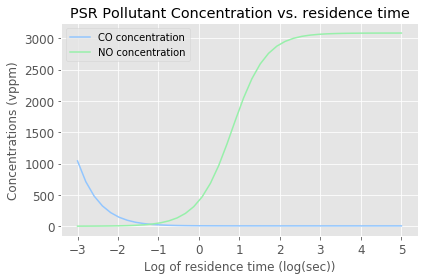

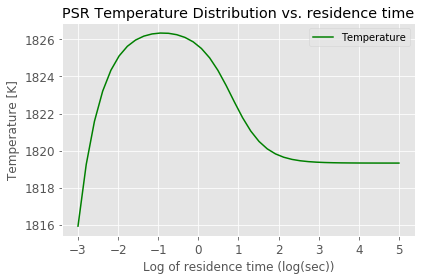

In [213]:
# Proof of argumentation made from part 1.4 regarding infinite residence
# time required for the PSR to reach values from the equilibrium case

#Range of log of time
log_t_res = np.linspace(-3,5,40)

#initializing matrices for the concentration of CO and NO, temperature, and residence time
X_CO_5 = np.zeros(log_t_res.shape)
X_NO_5 = np.zeros(log_t_res.shape)
res_time = np.zeros(log_t_res.shape)
Temp = np.zeros(log_t_res.shape)

# create gas object using GRI-Mech 3.0
gas5 = ct.Solution('gri30.xml')

for k in range(len(log_t_res)):
    
    res_time[k] = 10**log_t_res[k]
    
    # Stoichiometric methane air mixture, reservoir inlet
    gas5.TPX = 800, 30*ct.one_atm, 'CH4:0.4651, O2:2, N2:7.52'
    inlet = ct.Reservoir(gas5)
    
    gas5.equilibrate('HP')
    
    combustor5 = ct.IdealGasReactor(gas5)
    combustor5.volume = 0.40 #m^3
    
    # create a reservoir for the exhaust
    exhaust = ct.Reservoir(gas5)
    
# Instrument parameters
    
    # This is the "conductance" of the pressure valve and will determine its efficiency in 
    # holding the reactor pressure to the desired conditions. 
    pressureValveCoefficient = 0.01
    
    # This parameter will allow you to decide if the valve's conductance is acceptable. If there
    # is a pressure rise in the reactor beyond this tolerance, you will get a warning
    maxPressureRiseAllowed = 0.01
    
    pressureRegulator = ct.Valve(upstream=combustor5,
                                     downstream=exhaust,
                                     K=pressureValveCoefficient)
    
    # Simulation termination criterion
    maxSimulationTime = 5000  # seconds
    massFlowController = ct.MassFlowController(upstream=inlet,downstream=combustor5,mdot=combustor5.mass/res_time[k])
    
    sim = ct.ReactorNet([combustor5])
    
    # Initialization of network
    sim.advance_to_steady_state()
    
    X_CO_5[k]= combustor5.thermo['CO'].X*1e6
    X_NO_5[k]= combustor5.thermo['NO'].X*1e6
    Temp[k]=combustor5.T

plt.figure()
plt.plot(log_t_res, X_CO_5,label = 'CO concentration')
plt.plot(log_t_res, X_NO_5,label = 'NO concentration')
plt.grid(True)
plt.legend(loc='best')
plt.title('PSR Pollutant Concentration vs. residence time')
plt.xlabel('Log of residence time (log(sec))')
plt.ylabel('Concentrations (vppm)');

plt.figure()
plt.plot(log_t_res, Temp, 'g-',label = 'Temperature')
plt.grid(True)
plt.legend(loc='best')
plt.title('PSR Temperature Distribution vs. residence time')
plt.xlabel('Log of residence time (log(sec))')
plt.ylabel('Temperature [K]');

CO_min_5 = min(X_CO_5)
NO_max_5 = max(X_NO_5)
print('Min CO concentration at %2.3f vppm' %CO_min_5)
print('Max NO concentration at %2.3f vppm' %NO_max_5)

With regard to the plots above, we see that for an extended residence time in the PSR, the final pollutant concentrations, as well as the final temperature value, are approximately equal to those given in the equilibium case. 

The equilibrium function gave a temperature value of 1819.39 [K]. The plot demonstrates a final temperature value of 1819.4 [K]. The equilibrium function provided an $NO$ and $CO$ concentration of 3083.4 and 6.6 $vppm$ respectively. The plot provides an $NO$ and $CO$ concentration of 3082.619 and 6.56 $vppm$ respectively. This script therefore proves the argumentation posed in the previous section.

<a id='Section2'><a>
    
# Part 2 - RQL Combustor: Reactor Network Modeling


Rich-burn, quick-quench, lean-burn (RQL) combustors consist of a rich burning region, a rapid (here assumed instantaneous) quench of the reaction by air, followed by a lean-burn region. They are very abundant due to their ability to reduce pollutant emissions. 

In this section, the RQL combustor configuration shown below will be simulated using Cantera.


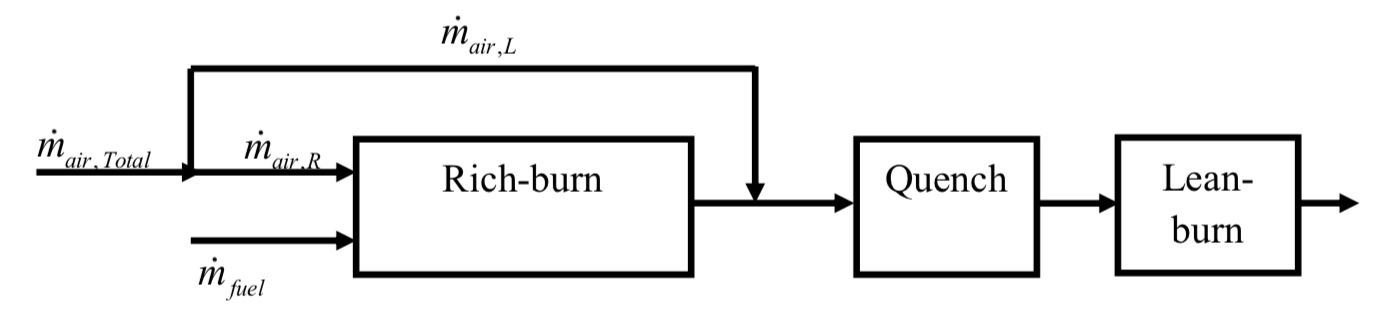

<br>
The fuel is given to be 100% pure methane ($\,CH_4\,$). A GRI 3.0 chemical kinetic mechanism will be implemented using Cantera. The rich and quench zones will be modeled as Perfectly Stirred Reactors (PSR), each with a volume of $0.005\,m^3$. The lean burn zone will use the remaining of the combustor volume (i.e. $0.39\,m^3$), and will modeled as a PFR using a series of 4 PSRs in series, each having an equal volume of $0.39/4\,=\,0.0975\,m^3$.

<br>

The following conditions are specified: <br>

* Total air flow rate:    $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\dot m_{air,\,total}\,= \,240\;kg/s$ <br>
* Fuel flow rate (methane): $\;\;\;\;\;\;\;\;\;\;\;\dot m_{fuel} \,=\, 6.522 \;kg/s$ <br>
* Overall Equivalence Ratio: $\;\;\;\;\;\;\;\,\phi_{overall} \,=\, 0.4656$ <br>
* Total Volume of combustor: $\;\;\;\;\;\;\;\;\;\,\,Vol \,=\, 0.40\;m^3$ <br>
* Operating Pressure: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\,\;P \,=\, 30\;atm$ <br>
* Operating Temperature: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;T \,=\, 800\;K$ <br>


* Rich Burn Zone:
    * Modeled as PSR <br>
    * Volume = 0.005 $m^3$ <br>
* Quench Zone:
    * Modeled as PSR <br>
    * Volume = 0.005 $m^3$ <br>
* Lean Burn Zone:
    * Modeled as PFR with 4 PSRs in series <br>
    * Volume of each PSR = 0.0975 $m^3$ <br>
    


<br>
<a id='Section2_1'><a>

## 2.1 - Varying the Equivalence Ratio of the Rich-Burn PSR

<br>

The equivalence ratio of the rich-burn PSR, $\,\phi_R$, is to be varied from 1 to 3 in steps of 0.1. Plots of temperature T, as well as of the molar concentrations of CO, UHC, and NO versus $\,\phi_R$ for both the first and last PSR will be generated.

<br>

The mass flow rate of air entering the rich-burn PSR can be determined from the equivalence ratio of the rich-burn PSR as follows:

$$\phi = \frac{F\big/A}{\left(F\big/A\right)_{stoich}}\space\space\;\;\; where \;\;\;\space\space \frac{F}{A}=\frac{\dot m_{fuel}}{\dot m_{air,\,R}}$$
<br>

$$So \;\;\;\;\;\;\space \phi = \frac{m_{fuel}\big/\dot m_{air,\,R}}{\left(F\big/A\right)_{stoich}}$$
<br>

$$\therefore\space \dot m_{air,R} = \frac{\dot m_{fuel}}{\phi\;\left(F\big/A\right)_{stoich}} \;=\; \frac{6.522}{0.05842\;\phi}\;=\; \frac{111.640}{\phi}$$

From conservation of mass,

$$\dot m_{air,\,total}=\dot m_{air,\,R}+\dot m_{air,\,L}$$

$$\therefore\space \dot m_{air,\,L}\;=\;\dot m_{air,\,total}-\dot m_{air,\,R}\;=\;240-\frac{111.640}{\phi}$$
<br>

The mass flow rate of the exhaust gas enterng the quench PSR can also be found from the conservation of mass,

$$\dot m_{air,\,exhaust\,R}=\dot m_{air,\,R}+\dot m_{fuel}$$

$$\therefore\;\;\dot m_{air,\,Q} \;=\; \dot m_{air,\,exhaust\,R}\,+\,m_{air,\,L} \;=\; \dot m_{air,\,R}+\,m_{air,\,L}\,+\,\dot m_{fuel}$$

However, the flow of the exhaust from the high-burn PSR is regulated by a valve instead of a mass flow controller to the inlet of the quench PSR, and the same applies for the lean-burn PFR.

<br>

In [40]:
# Range of Equivalence Ratios for Rich-burn PSR
phi = np.linspace(1, 3, 21)

# Initialize Matrices for Temperatures T1, T2 and Concentrations of CO and NO
T1 = np.zeros((21,1));
T2 = np.zeros((21,1));
X1_CO = np.zeros((21,1));
X1_NO = np.zeros((21,1));
X2_CO = np.zeros((21,1));
X2_NO = np.zeros((21,1));

# Reservoir for the fuel inlet, and set to pure methane.
fuel = ct.Solution('gri30.cti')
fuel.TPX = 800.0, 30*ct.one_atm, 'CH4:1.0'
fuel_in = ct.Reservoir(fuel)

# Reservoir for the oxidizer (here air):
air = ct.Solution('gri30.cti')
air.TPX = 800.0, 30*ct.one_atm, 'O2:0.21, N2:0.79'
air_inR = ct.Reservoir(air)                            # Rich-Burn Air Stream
air_inL = ct.Reservoir(air)                            # Quench Air Stream


print('\n\nThe data (temperatures and concentrations) for the first and last PSRs, is presented below:\n\n')


for i in range(len(phi)):

    
    ###_______________RICH BURN PSR______________###


    # Here, we'll create our reactor (combustor):
    # Something that should be noted is that we need a igniter to start our combustor. To create this igniter, 
    # we'll fill the combustor initially with stoichiometric mixture of CH4 and O2 at 3500K. This will start the
    # reactor and since is a transient state, this will not affect the steady state solution.
    combustor_ignition_gas = ct.Solution('gri30.cti')
    combustor_ignition_gas.TPX = 3500.0, 30*ct.one_atm, 'CH4:1.0, O2:2.0'
    combustor_rich = ct.Reactor(combustor_ignition_gas)

    # Set the volume of the reactor:
    combustor_rich.volume = .005


    # Fuel and air mass flow rates: input your calculated values for fuel and air flow rates: 
    fuel_mdot = Flowrate_CH4    # kg/s
    air_mdotR =  Flowrate_CH4/(phi[i]*F_A_stoich)    # kg/s

    # Specifying the direction of the flow and the amount of the flow that is flowing in between the reactors:
    m1 = ct.MassFlowController(fuel_in, combustor_rich, mdot=fuel_mdot)
    m2 = ct.MassFlowController(air_inR, combustor_rich, mdot=air_mdotR)

    
    ###____________ QUENCH PSR_____________ ###

    combustor_quench = ct.Reactor(combustor_ignition_gas)
    combustor_quench.volume = .005

    air_mdotL =  (Flowrate_air - air_mdotR)   # kg/s

    # Specifying the direction of the flow and the amount of the flow that is flowing in between the reactors:
    m3 = ct.MassFlowController(air_inL, combustor_quench, mdot = air_mdotL)
    
    
    # Put an inter-combustor valve with a valve coefficient of 40. This exhaust valve will regulate the pressure in the combustors.
    interCombustor_valve1 = ct.Valve(combustor_rich, combustor_quench , K=40)
    
    
    ###_____________LEAN BURN PSR___________###

    combustor_lean1 = ct.Reactor(combustor_ignition_gas)
    combustor_lean2 = ct.Reactor(combustor_ignition_gas)
    combustor_lean3 = ct.Reactor(combustor_ignition_gas)
    combustor_lean4 = ct.Reactor(combustor_ignition_gas)
    combustor_lean1.volume = 0.0975
    combustor_lean2.volume = 0.0975
    combustor_lean3.volume = 0.0975
    combustor_lean4.volume = 0.0975

    
    # Put an inter-combustor valve with a valve coefficient of 40. This exhaust valve will regulate the pressure in the combustors.
    interCombustor_valve2 = ct.Valve(combustor_quench, combustor_lean1 , K=40)
    interCombustor_valve3 = ct.Valve(combustor_lean1, combustor_lean2 , K=40)
    interCombustor_valve4 = ct.Valve(combustor_lean2, combustor_lean3 , K=40)
    interCombustor_valve5 = ct.Valve(combustor_lean3, combustor_lean4 , K=40)
    
    
    # Create a Reservoir for the exhaust: Same 'gas' which reacted in the combustor will enter exhaust reservoir
    exhaust = ct.Reservoir(combustor_ignition_gas)
    
    # Put an exhaust valve with a high valve coefficient (1.0) to keep P constant inside the combustion chamber.
    exhaust_valve = ct.Valve(combustor_lean4, exhaust , K=1.0)


    ########################################## REACTOR NETWORK 1 #############################################

    RQL = ct.ReactorNet([combustor_rich,combustor_quench,combustor_lean1,combustor_lean2,combustor_lean3,combustor_lean4])
    #RQL = ct.ReactorNet([combustor_rich,combustor_quench,combustor_lean1])

    # Initialization of network - Advance to Steady State:
    RQL.advance_to_steady_state()
    
    
    # Obtain Temperature and Concentrations for 1st PSR (Rich)
    T1[i] = combustor_rich.T
    X1_NO[i] = combustor_rich.thermo['NO'].X*1e6
    X1_CO[i] = combustor_rich.thermo['CO'].X*1e6

    
    # Obtain Temperature and Concentrations for last PSR (Lean #4)
    T2[i] = combustor_lean4.T
    X2_NO[i]= combustor_lean4.thermo['NO'].X*1e6
    X2_CO[i]= combustor_lean4.thermo['CO'].X*1e6

    
    print('phi = %.1f :' % phi[i])
    print('    T1 = %5.2f K' % T1[i], '  ;   X1_CO = %2.3f vppm' % X1_CO[i], '  ;   X1_NO = %3.3f vppm' % X1_NO[i])
    print('    T2 = %5.2f K' % T2[i], '  ;   X2_CO = %2.3f vppm' % X2_CO[i], '    ;   X2_NO = %3.3f vppm\n' % X2_NO[i])




The data (temperatures and concentrations) for the first and last PSRs, is presented below:


phi = 1.0 :
    T1 = 2546.13 K   ;   X1_CO = 15040.033 vppm   ;   X1_NO = 893.346 vppm
    T2 = 1825.81 K   ;   X2_CO = 6.965 vppm     ;   X2_NO = 447.580 vppm

phi = 1.1 :
    T1 = 2539.48 K   ;   X1_CO = 30922.004 vppm   ;   X1_NO = 730.470 vppm
    T2 = 1826.06 K   ;   X2_CO = 6.980 vppm     ;   X2_NO = 345.140 vppm

phi = 1.2 :
    T1 = 2482.68 K   ;   X1_CO = 48937.485 vppm   ;   X1_NO = 501.491 vppm
    T2 = 1826.31 K   ;   X2_CO = 6.997 vppm     ;   X2_NO = 236.710 vppm

phi = 1.3 :
    T1 = 2413.90 K   ;   X1_CO = 63897.278 vppm   ;   X1_NO = 303.915 vppm
    T2 = 1826.47 K   ;   X2_CO = 7.007 vppm     ;   X2_NO = 171.047 vppm

phi = 1.4 :
    T1 = 2345.86 K   ;   X1_CO = 73811.094 vppm   ;   X1_NO = 142.266 vppm
    T2 = 1826.58 K   ;   X2_CO = 7.014 vppm     ;   X2_NO = 125.257 vppm

phi = 1.5 :
    T1 = 2282.98 K   ;   X1_CO = 79128.936 vppm   ;   X1_NO = 55.559 vppm
    T2 = 1826



For the first PSR (i.e. the rich-burn PSR):



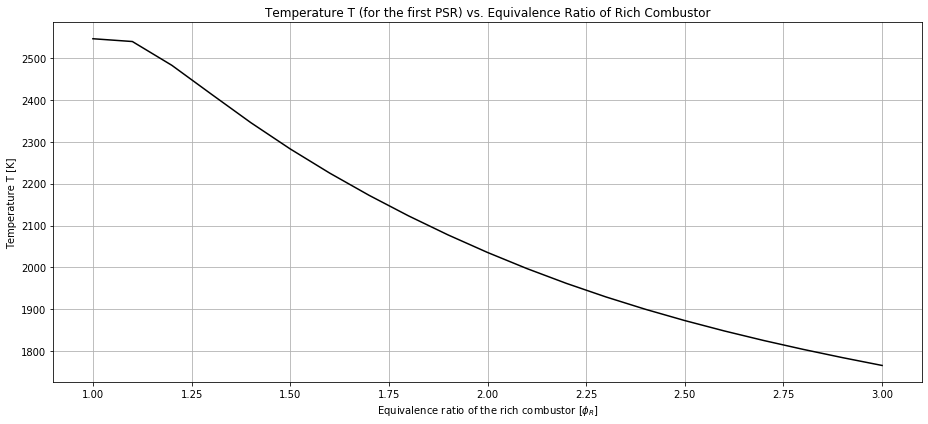

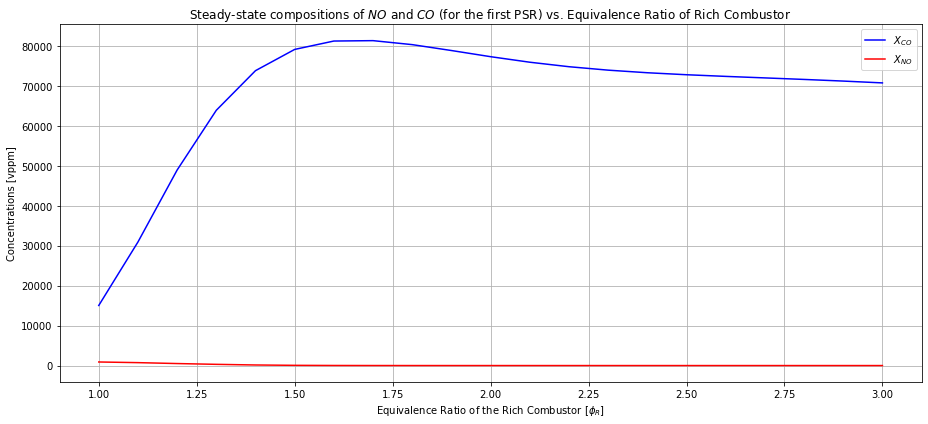

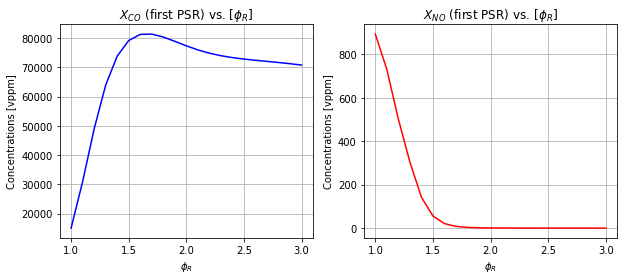




For the last PSR (i.e. the 4th lean-burn PSR):



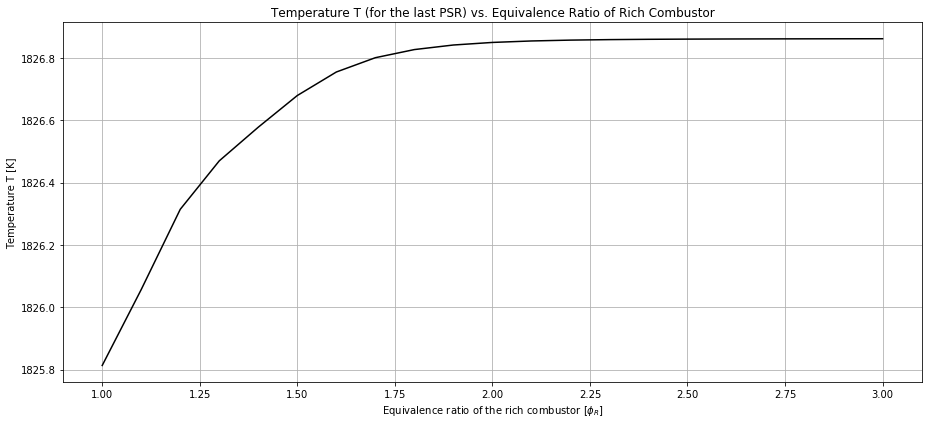

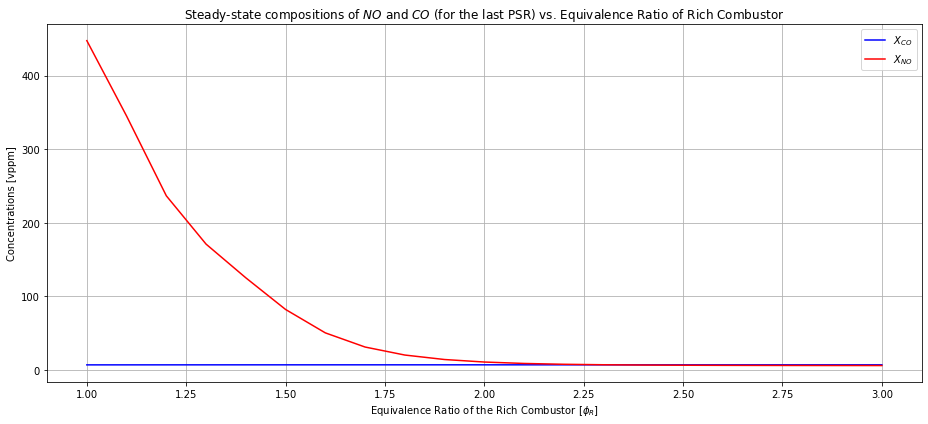

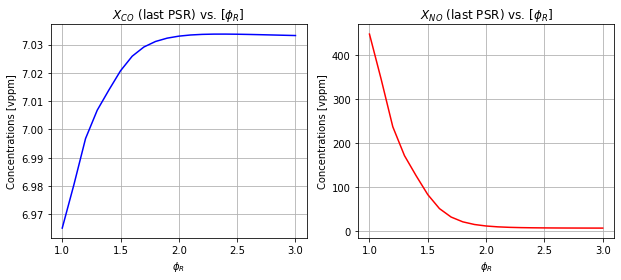

In [41]:
# Plots:

print('\n\nFor the first PSR (i.e. the rich-burn PSR):\n')
plt.figure(figsize=(13,6))
plt.plot(phi, T1, color="black")
plt.grid(True)
plt.xlabel('Equivalence ratio of the rich combustor [$\phi_R$]')
plt.ylabel('Temperature T [K]')
plt.title('Temperature T (for the first PSR) vs. Equivalence Ratio of Rich Combustor')
plt.tight_layout()
plt.show()  

plt.figure(figsize=(13,6))
plt.plot(phi, X1_CO, color="blue", label = "$X_{CO}$")
plt.legend(loc=1)
plt.plot(phi, X1_NO, color="red", label = "$X_{NO}$")
plt.legend(loc=1)
plt.grid(True)
plt.xlabel('Equivalence Ratio of the Rich Combustor [$\phi_R$]')
plt.ylabel('Concentrations [vppm]')
plt.title('Steady-state compositions of $NO$ and $CO$ (for the first PSR) vs. Equivalence Ratio of Rich Combustor')
plt.tight_layout()
plt.show()  

fig, axes = plt.subplots(figsize=(13,4))
plt.clf()
plt.subplot(1, 3, 1)
plt.plot(phi, X1_CO, color="blue", label = "$X_{CO}$")
plt.grid(True)
plt.xlabel('$\phi_R$')
plt.ylabel('Concentrations [vppm]')
plt.title('$X_{CO}$ (first PSR) vs. [$\phi_R$]')
plt.subplot(1, 3, 2)
plt.plot(phi, X1_NO, color="red", label = "$X_{NO}$")
plt.xlabel('$\phi_R$')
plt.ylabel('Concentrations [vppm]')
plt.title('$X_{NO}$ (first PSR) vs. [$\phi_R$]')
plt.grid(True)
plt.tight_layout()
plt.show()  



print('\n\n\nFor the last PSR (i.e. the 4th lean-burn PSR):\n')

plt.figure(figsize=(13,6))
plt.plot(phi, T2, color="black")
plt.grid(True)
plt.xlabel('Equivalence ratio of the rich combustor [$\phi_R$]')
plt.ylabel('Temperature T [K]')
plt.title('Temperature T (for the last PSR) vs. Equivalence Ratio of Rich Combustor')
plt.tight_layout()
plt.show()  

plt.figure(figsize=(13,6))
plt.plot(phi, X2_CO, color="blue", label = "$X_{CO}$")
plt.legend(loc=1)
plt.plot(phi, X2_NO, color="red", label = "$X_{NO}$")
plt.legend(loc=1)
plt.grid(True)
plt.xlabel('Equivalence Ratio of the Rich Combustor [$\phi_R$]')
plt.ylabel('Concentrations [vppm]')
plt.title('Steady-state compositions of $NO$ and $CO$ (for the last PSR) vs. Equivalence Ratio of Rich Combustor')
plt.tight_layout()
plt.show()  

fig, axes = plt.subplots(figsize=(13,4))
plt.clf()
plt.subplot(1, 3, 1)
plt.plot(phi, X2_CO, color="blue", label = "$X_{CO}$")
plt.grid(True)
plt.xlabel('$\phi_R$')
plt.ylabel('Concentrations [vppm]')
plt.title('$X_{CO}$ (last PSR) vs. [$\phi_R$]')
plt.subplot(1, 3, 2)
plt.plot(phi, X2_NO, color="red", label = "$X_{NO}$")
plt.xlabel('$\phi_R$')
plt.ylabel('Concentrations [vppm]')
plt.title('$X_{NO}$ (last PSR) vs. [$\phi_R$]')
plt.grid(True)
plt.tight_layout()
plt.show()  




##### Please note the additional graphs produced above, namely the individual plots for the molar concentrations of $CO$ and $NO$ for the first and last PSR, are for added clarity since the vertical axis scaling is not suitable for relatively small changes.

<br>
<a id='Section2_2'><a>

## 2.2 - Range of Equivalence Ratio for NO and CO to be below 25 vppm

Looking at the plots of NO and CO concentrations versus equivalence ratio for the last PSR (i.e. for the complete RQL configuration), it can be seen graphically that the concentration of CO will always be less than 25 vppm for the range of $\phi_R$ between 1.0 and 3.0 (it is always in the range of 6.96 to 7.04), whereas the concentration of NO (which has a decreasing trend towards zero), will reach 25 vppm at a certain value of $\phi_R$ between 1.6 and 1.9. These ranges are clearly seen when a dashed horizontal line representing 25 vppm is superimposed onto the plot (this black dashed line can be seen in the modified plot below). 

Additionally, from the data obtained in Section 2.1 for NO concentrations (last PSR), it can clearly be seen that [NO] will be $25 \;vppm$ at a value of $\phi_R$ between $1.7$ and $1.8$, since the concentrations at these two equivalence ratios are $31.204 \;vppm$ and $20.316 \;vppm$ respectively.

Now that a reasonable range for the desired $\phi_R$ value (the lower limit) is chosen, a linear interpolation was performed between $\phi_R\;=\;1.7$ and $\phi_R\;=\;1.8$ in order to determine a more accurate value of $\phi_R$ where the concentration of NO reached $25 \;vppm$. The code below presents the linear interpolation process and outputs a plot that clearly shows the range where both NO and CO are below 25 vppm.

<br>




The concentration of CO varies between 6.96 vppm and 7.04 vppm at all phi values between 1 and 3, so the desired range is simply the range of phi for which the concentration of NO is below 25 vppm.

The concentration of NO at phi = 1.7 is: 31.204 vppm
The concentration of NO at phi = 1.8 is: 20.316 vppm

A linear interpolation was performed between these two points, with the aim of obtaining the value of phi for which the concentration of NO is exactly 25 vppm

The obtained value of phi is:
phi = 1.757


The plot below shows the variation of NO and CO concentrations versus the equivalence ratio of the rich combustor, with the black dot representing the lower limit - at phi = 1.757 (the point at which NO = 25 vppm), and the desired region for both NO and CO to be below 25 vppm represented by the green box.



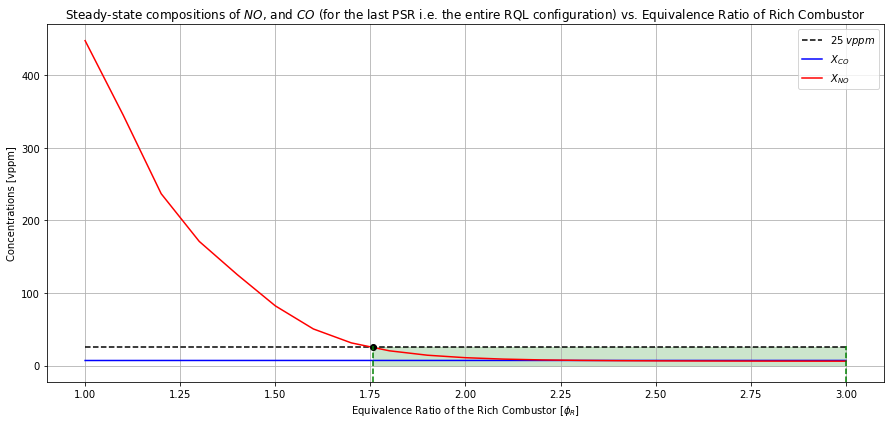

In [48]:
# Initializations
X_limit = 25*np.ones((21,1))
NO_limit1 = X2_NO[7];
NO_limit2 = X2_NO[8];
phi_limit1 = 1.7;
phi_limit2 = 1.8;

# Linear Interpolation
phi_limit = phi_limit1 + (((phi_limit2 - phi_limit1)/(NO_limit2 - NO_limit1)) * (25 - NO_limit1) )

print('\n\nThe concentration of CO varies between 6.96 vppm and 7.04 vppm at all phi values between 1 and 3, so the desired range is simply the range of phi for which the concentration of NO is below 25 vppm.')
print('\nThe concentration of NO at phi = 1.7 is: %3.3f vppm' % NO_limit1)
print('The concentration of NO at phi = 1.8 is: %3.3f vppm' % NO_limit2)
print('\nA linear interpolation was performed between these two points, with the aim of obtaining the value of phi for which the concentration of NO is exactly 25 vppm')
print('\nThe obtained value of phi is:')
print('phi = %1.3f' % phi_limit)

print('\n\nThe plot below shows the variation of NO and CO concentrations versus the equivalence ratio of the rich combustor, with the black dot representing the lower limit - at phi = 1.757 (the point at which NO = 25 vppm), and the desired region for both NO and CO to be below 25 vppm represented by the green box.\n')


# Plot Figure
plt.figure(figsize=(13,6))
plt.plot(phi, X_limit, '--', color='black', label = "$25\;vppm$")
plt.legend(loc=1)
plt.plot(phi, X2_CO, color="blue", label = "$X_{CO}$")
plt.legend(loc=1)
plt.plot(phi, X2_NO, color="red", label = "$X_{NO}$")
plt.legend(loc=1)
plt.plot(phi_limit,25, marker = "o", color = "black")
plt.axvline(ls='dashed', x = phi_limit,  ymin=0, ymax = 0.1,  color='green')
plt.axvline(ls='dashed', x = 3.0,  ymin=0, ymax = 0.1,  color='green')
plt.fill_betweenx([0, 25], phi_limit, 3.0, alpha = 0.2, color = 'green')
plt.grid(True)
plt.xlabel('Equivalence Ratio of the Rich Combustor [$\phi_R$]')
plt.ylabel('Concentrations [vppm]')
plt.title('Steady-state compositions of $NO$, and $CO$ (for the last PSR i.e. the entire RQL configuration) vs. Equivalence Ratio of Rich Combustor')
plt.tight_layout()
plt.show()  

<br>
A zoomed-in plot for the range of $\phi_R$ between $1.7$ and $3.0$, which shows the desired range more clearly, is presented below.

<br>

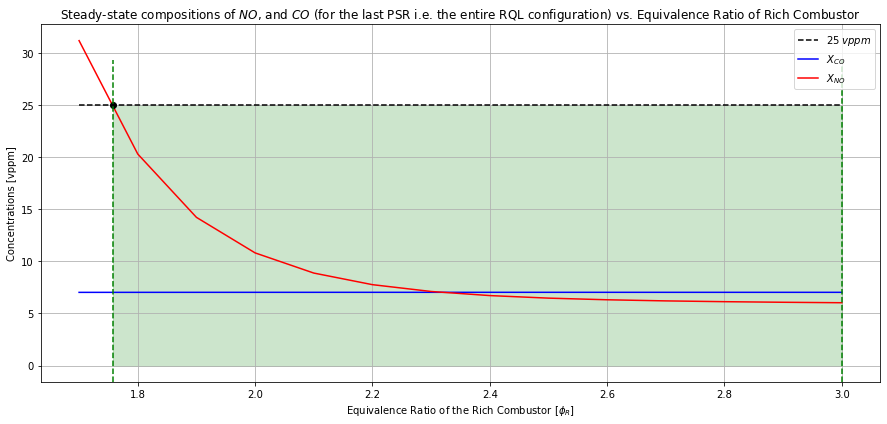

In [58]:
# Plot Figure
X_limit2 = 25*np.ones((14,1))
plt.figure(figsize=(13,6))
plt.plot([1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0], X_limit2, '--', color='black', label = "$25\;vppm$")
plt.legend(loc=1)
plt.plot([1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0], X2_CO[7:21], color="blue", label = "$X_{CO}$")
plt.legend(loc=1)
plt.plot([1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0], X2_NO[7:21], color="red", label = "$X_{NO}$")
plt.legend(loc=1)
plt.plot(phi_limit,25, marker = "o", color = "black")
plt.axvline(ls='dashed', x = phi_limit,  ymin=0, ymax = 0.9,  color='green')
plt.axvline(ls='dashed', x = 3.0,  ymin=0, ymax = 0.9,  color='green')
plt.fill_betweenx([0, 25], phi_limit, 3.0, alpha = 0.2, color = 'green')
plt.grid(True)
plt.xlabel('Equivalence Ratio of the Rich Combustor [$\phi_R$]')
plt.ylabel('Concentrations [vppm]')
plt.title('Steady-state compositions of $NO$, and $CO$ (for the last PSR i.e. the entire RQL configuration) vs. Equivalence Ratio of Rich Combustor')
plt.tight_layout()
plt.show()  

<br>
In recap, the range of $\phi_R$ for which both $\left[NO\right]$ and $[CO]$ concentrations have concentrations below 25 vppm is:

$$ \phi_R \;>\; 1.757 $$

Note that for the calculations performed in this report, only equivalence ratios up to 3.0 were taken into account, so $\;\phi_R\;=\;3.0\;$ can be considered an upper limit for the scope of this project.


Additionally, it can also be observed that the $[NO]$ concentration is greater than the $[CO]$ concentration for values of $\phi_R$ up to around $2.3$


<br>
<a id='Section2_3'><a>

## 2.3 - Comparing Pollutant Emissions in Different Reactors
<br>

Plots of concentrations for the RQL combustor, the PSR, and the equilibrium conditions of CO and NO respectively, are presented below:

<br>

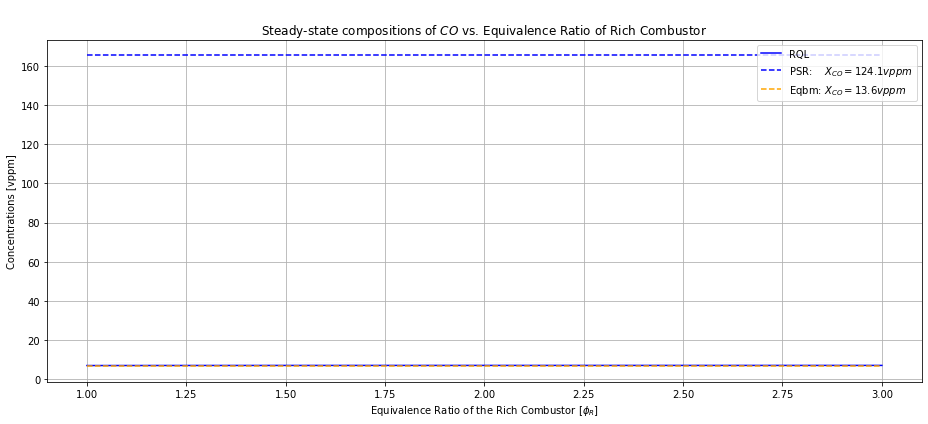

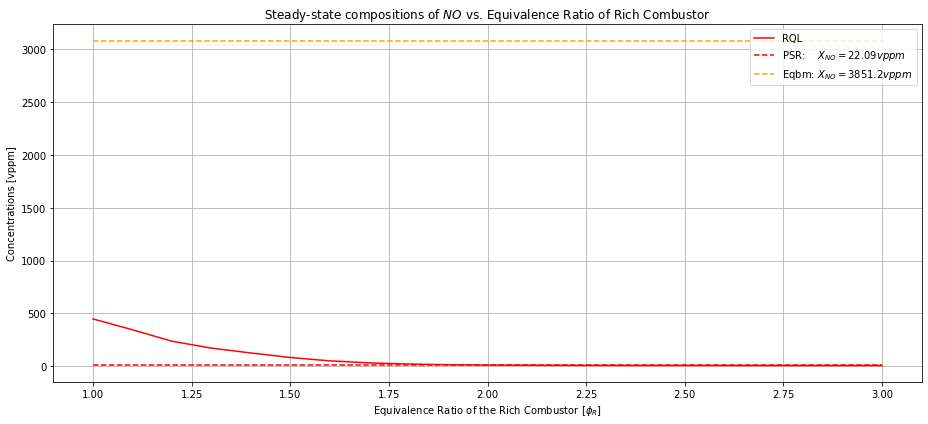

In [60]:
# Initializations
CO_PSR = 165.4*np.ones((21,1))
CO_EQ = 6.6*np.ones((21,1))
NO_PSR = 7.13*np.ones((21,1))
NO_EQ = 3083.4*np.ones((21,1))


plt.figure(figsize=(13,6))
plt.plot(phi, X2_CO, color="blue", label = "RQL")
plt.legend(loc=1)
plt.plot(phi, CO_PSR, '--', color='blue', label = "PSR:    $X_{CO} = 124.1 vppm$")
plt.legend(loc=1)
plt.plot(phi, CO_EQ, '--', color='orange', label = "Eqbm: $X_{CO} = 13.6 vppm$")
plt.legend(loc=1)
plt.grid(True)
plt.xlabel('Equivalence Ratio of the Rich Combustor [$\phi_R$]')
plt.ylabel('Concentrations [vppm]')
plt.title('\nSteady-state compositions of $CO$ vs. Equivalence Ratio of Rich Combustor')
plt.tight_layout()
plt.show()  


plt.figure(figsize=(13,6))
plt.plot(phi, X2_NO, color="red", label = "RQL")
plt.legend(loc=1)
plt.plot(phi, NO_PSR, '--', color='red', label = "PSR:    $X_{NO} = 22.09 vppm$")
plt.legend(loc=1)
plt.plot(phi, NO_EQ, '--', color='orange', label = "Eqbm: $X_{NO} = 3851.2 vppm$")
plt.legend(loc=1)
plt.legend(loc=1)
plt.grid(True)
plt.xlabel('Equivalence Ratio of the Rich Combustor [$\phi_R$]')
plt.ylabel('Concentrations [vppm]')
plt.title('Steady-state compositions of $NO$ vs. Equivalence Ratio of Rich Combustor')
plt.tight_layout()
plt.show()  

In [61]:
CO_min = min(X2_CO)
NO_min = min(X2_NO)


print('\n\nThe minimum concentration values of CO and NO for the RQL combustor are:\n')
print('[CO]_min  =  %.2f vppm' % CO_min)
print('[NO]_min  =  %.2f vppm' % NO_min)




The minimum concentration values of CO and NO for the RQL combustor are:

[CO]_min  =  6.97 vppm
[NO]_min  =  6.03 vppm


<br>
The minimum concentration values of $CO$ and $NO$ calculated using the RQL simulation, the PSR simulation, as well as the equilibrium values of these concentrations, are all presented in the table below:

<br>

|$\;$ Concentration|$\;\;\;\;\;$ RQL Values (min)| $\;\;\;\;\;\;$ PSR Values|$\;\;\;\;$  Equilibrium Values  | 
|----------------------------|-----------|----------|-----------|
| $x_{CO}$ [vppm]            | 6.97      | 165.4     | 6.6       | 
| $x_{NO}$ [vppm]            | 6.03      | 7.13      | 3083.4    | 

<br>


### Discussion:

<br>

- **Concentration of CO:** 

    The minimum $CO$ Concentration for the RQL combustor is significantly smaller than the PSR value -- by around 158 vppm $\big(\,6.97\;vppm\,$ versus $\,165.4\;vppm\,\big)$, but just slightly greater than the equilibrium value -- by 0.37 vppm $\big(\,6.97\;vppm\,$ versus $\,6.6\;vppm\,\big)$. <br>
    <br>
    
    - Percentage Difference With PSR:  $$ \% diff_1 = \frac{165.4-6.97}{165.4}\;\times\;100 \;=\; 95.8 \% \;smaller$$
    <br>
    - Percentage Difference With Equilibrium: 
        $$ \% diff_2 = \frac{6.97-6.6}{6.6}\;\times\;100 \;=\; 5.6 \% \;larger$$
    <br>
    
    The equilibrium reactor always has the lowest conentration $[X_{CO}]$ because, as mentioned in Section 1.4, there is enough time for most of the  $CO$  to react with $O_2$ to form $CO_2$ (one can say infinite residence time). However, the RQL does come very close to the equilibrium condition when it comes to reducing the $CO$ concentrations at the exhaust; the $CO$ emissions are much less than those obtained through the PSR simulation. This is because the RQL combustor provides more time for the oxidation of $CO$ into $CO_2$ when compared to the PSR, but most likely not as much time as the equilibrium reactor. Additionally, the dissociation  of $CO_2$ and the oxidation of $C$ into $CO$ may also play a small role in why the RQL values are slightly larger than the equilibrium values.

<br>

- **Concentration of NO:** 

    The minimum $NO$ Concentration for the RQL combustor is just slightly smaller than the PSR value by around 1.1 vppm $\big(\,6.03\;vppm\,$ versus $\,7.13\;vppm\,\big)$, but significantly smaller than the equilibrium value -- this time by around 3077 vppm $\big(\,6.03\;vppm\,$ versus $\,3083.4\;vppm\,\big)$. <br>
    <br>
    
    - Percentage Difference With PSR:  $$ \% diff_1 = \frac{7.13-6.03}{7.13}\;\times\;100 \;=\; 15.4 \% \;smaller$$
    <br>
    - Percentage Difference With Equilibrium: 
        $$ \% diff_2 = \frac{3083.4-6.03}{3083.4}\;\times\;100 \;=\; 99.8 \% \;smaller$$
    <br>
    
    The equilibrium reactor has the highest concentration $X_{NO}$ because the infinite residence time allows for more $N_2$ to dissociate into $NO$ in the high temperature environment compared to the finite residence times in the PSR and in the RQL combustor. 
    
    The minimum concentration value of NO in the RQL is slightly smaller than the PSR value, but looking at the trend of NO concentration for different $\phi_R$ values in the RQL, it can be seen that for the range of equivalence values between roughly 1.0 to 1.9, the PSR had the lower NO concentration. With regard to the RQL, the NO concentration plot had a decreasing trend for increasing equivalence ratios, thus $X_{NO}$ ended up being slightly less than the PSR value for the range of $\phi_R$ between around 1.9 and 3.0. This range obviously included the minimum value (6.03 vppm). The reason for this decrease in NO concentrations in the RQL for increasing equivalence ratios is the fact that when there is more air in the system compared to fuel, there will be more oxygen which will yield a higher flame temperature. It is important to note that the formation of $NO$ is a result of the dissociation of $N_2$ at high temperatures $\left(T > 1700 \right)$. As a result, the dissociation into $NO$ will increase. Furthermore there will be less $CO$ that is competing with $N_2$ to react with $O_2$. When there is more fuel ($\phi_R$ more than 1.9 in this case), the opposite happens; the flame temperature will decrease and there will be more  $CO$ competing with $N_2$ to react with $O_2$. Recall that the fuel has a higher specific heat capacity than air so the temperature of the reactor is maintained at a lower level. Due to the relatively low temperatures the Zeldovich mechanism for $NO_x$ production, which is only initiated at temperatures greater than 1700 K, is not engaged at higher equivalence ratios.



<a id='Section2_4'><a>
## 2.4 - Bonus Question

The effect of increased relative humidity on the prediction of $NO$ would be a reduction in the production, and hence a reduction in the concentration of $NO$. A significant precense of relative humidity essentially raises the heat capacity of the gas mixture (since water's heat capacity is relatively high), which lowers combustion temperatures (lower heat release). This therefore limits the $NO$ thermal formation pathways (Zeldovich mechanism for $NO_x$), as previously discussed in section 2.3, which is favored at higher temperatures. In addition, increasing relative humidity inhibits $NO$ production due to the decrease in available monoatomic oxygen that is required in the Zeldovich mechanism.

<a id='Section3'><a>
# Part 3 - Fire Hazard Assesment: Fuel Leak

<a id='Section3_1'><a>
## 3.1 - Possibility of starting a Fire

We use a well-stirred reactor to simulate the conditions for the possibility of a fire, coded out below:


Temperature rise: 3.9279 K

initial n-heptane concentration: 18740.630 vppm
final n-heptane concentration: 18428.187 vppm

initial CO2 concentration: 0.000 vppm
final CO2 concentration: 0.023 vppm


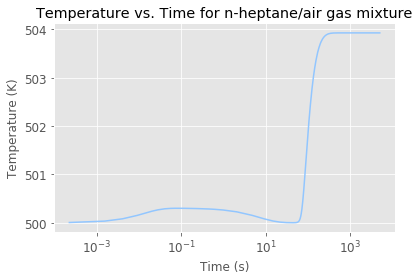

In [189]:
########____________ ambient conditions_____________#######
room_T = 500 #K
room_P = ct.one_atm 
room_V = 24  # m^3, room dimensions
flow = 3.43 #m^3/s

# instrument parameters

# "conductance" of the pressure valve and will determine its efficiency in 
# holding the reactor pressure to the desired conditions. 
pressureValveCoefficient = 0.01

# This parameter will allow you to decide if the valve's conductance is acceptable. If there
# is a pressure rise in the reactor beyond this tolerance, you will get a warning
maxPressureRiseAllowed = 0.01

# Simulation termination criterion
maxSimulationTime = 5000  # seconds

########_________Gas, Reservoirs, and Reactor____________#######

# Initializing Gas Mixture
gas = ct.Solution('seiser1.cti')
gas.set_equivalence_ratio(1.0, 'nc7h16:1','O2:1, N2:3.76') #stoichiometric
gas.TP = room_T, room_P

#reservoir for gas mixture 
gas_mix = ct.Reservoir(gas)

#exhaust reservoir
exhaust = ct.Reservoir(gas)

# Reactor
#room is modelled as a PSR
React = ct.IdealGasReactor(gas, energy='on', volume=room_V)
residenceTime = room_V/flow

# Mass flow controller for gas mixture
massFlowController = ct.MassFlowController(upstream=gas_mix,
                                           downstream=React,
                                           mdot=React.mass/residenceTime)

pressureRegulator = ct.Valve(upstream=React,
                             downstream=exhaust,
                             K=pressureValveCoefficient)

reactorNetwork = ct.ReactorNet([React])

# Now compile a list of all variables for which we will store data
columnNames = [React.component_name(item) for item in range(React.n_vars)]
columnNames = ['pressure'] + columnNames

# Use the above list to create a DataFrame
timeHistory = pd.DataFrame(columns=columnNames)

# Start the stopwatch
tic = time.time()

# Set simulation start time to zero
t = 0
counter = 1

#print initial fuel and product concentrations in the room, to see if fire happens
fuel_vppm_i = React.thermo['NC7H16'].X*1e6
C02_vppm_i = React.thermo['CO2'].X*1e6

#run simulation
while t < maxSimulationTime:
    t = reactorNetwork.step()

    # We will store only every 5th value. Remember, we have 1200+ species, so there will be
    # 1200 columns for us to work with
    if(counter%5 == 0):
        # Extract the state of the reactor
        state = np.hstack([React.thermo.P, React.mass, 
                   React.volume, React.T, React.thermo.X])
        
        # Update the dataframe
        timeHistory.loc[t] = state
    
    counter += 1

# Stop the stopwatch
toc = time.time()

# We now check to see if the pressure rise during the simulation, a.k.a the pressure valve
# was okay
pressureDifferential = timeHistory['pressure'].max()-timeHistory['pressure'].min()
if(abs(pressureDifferential/ct.one_atm) > maxPressureRiseAllowed):
    print("WARNING: Non-trivial pressure rise in the reactor. Adjust K value in valve")

plt.figure()
plt.semilogx(timeHistory.index, timeHistory.temperature)
plt.grid(True)
plt.title('Temperature vs. Time for n-heptane/air gas mixture')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)');

T_final=React.T #K
Temp_change = T_final - room_T #K

fuel_vppm_f = React.thermo['nc7h16'].X*1e6
C02_vppm_f = React.thermo['CO2'].X*1e6

print('Temperature rise: %1.4f K\n' %Temp_change)
print('initial n-heptane concentration: %3.3f vppm' %fuel_vppm_i)
print('final n-heptane concentration: %3.3f vppm\n' %fuel_vppm_f)
print('initial CO2 concentration: %3.3f vppm' %C02_vppm_i)
print('final CO2 concentration: %3.3f vppm' %C02_vppm_f)


Given a small temperature rise of about 4K coupled with a negligible difference in the fuel and carbon dioxide (a byproduct of combustion) concentrations, we can assume that a fire is not possible for this given scenario.


<a id='Section3_2'><a>
## 3.2 - Autoignition Delay vs. 1000/T for Stagnant Conditions

Using a Batch Reactor, we define the temperatures and conditions for which we will run the simulations to compute the autoignition delay vs 1000/T, coded below:

In [111]:
def ignitionDelay(df, species):
    """
    This function computes the ignition delay from the occurence of the
    peak in species' concentration.
    """
    return df[species].idxmax()

stateVariableNames = [r.component_name(item) for item in range(r.n_vars)]
gas = ct.Solution('seiser1.cti')

# Make a list of all the temperatures we would like to run simulations at
T = [1600, 1400, 1200, 1000, 950, 925, 900, 850, 825, 800,
     750, 700, 675, 650, 625, 600, 575, 525, 500]

estimatedIgnitionDelayTimes = np.ones(len(T))

# Make time adjustments for the highest and lowest temperatures. This we do empirically
estimatedIgnitionDelayTimes[:6] = 6*[0.1]
estimatedIgnitionDelayTimes[-2:] = 10
estimatedIgnitionDelayTimes[-1] = 100

# Now create a dataFrame out of these
ignitionDelays = pd.DataFrame(data={'T': T})
ignitionDelays['ignDelay'] = np.nan

for i, temperature in enumerate(T):
    # Setup the gas and reactor
    reactorTemperature = temperature
    reactorPressure = 1*ct.one_atm
    gas.TP = reactorTemperature, reactorPressure
    gas.set_equivalence_ratio(phi=1.0, fuel='nc7h16', oxidizer={'o2':1.0, 'n2':3.76})
    r = ct.IdealGasReactor(contents=gas, name='Batch Reactor')
    reactorNetwork = ct.ReactorNet([r])

    # Create and empty data frame
    timeHistory = pd.DataFrame(columns=stateVariableNames)

    t0 = time.time()

    t = 0
    counter = 0
    while t < estimatedIgnitionDelayTimes[i]:
        t = reactorNetwork.step()
        if not counter % 20:
            timeHistory.loc[t] = r.get_state()
        counter += 1

    tau = ignitionDelay(timeHistory, 'oh')
    t1 = time.time()

    print('Computed Ignition Delay: {:.3e} seconds for T={}K. Took {:3.2f}s to compute'.format(tau, temperature, t1-t0))

    ignitionDelays.at[i, 'ignDelay'] = tau

Computed Ignition Delay: 3.580e-05 seconds for T=1600K. Took 1.01s to compute
Computed Ignition Delay: 1.610e-04 seconds for T=1400K. Took 1.00s to compute
Computed Ignition Delay: 1.630e-03 seconds for T=1200K. Took 1.08s to compute
Computed Ignition Delay: 3.248e-02 seconds for T=1000K. Took 1.26s to compute
Computed Ignition Delay: 7.909e-02 seconds for T=950K. Took 1.19s to compute
Computed Ignition Delay: 1.002e-01 seconds for T=925K. Took 0.12s to compute
Computed Ignition Delay: 1.983e-01 seconds for T=900K. Took 1.36s to compute
Computed Ignition Delay: 4.266e-01 seconds for T=850K. Took 1.34s to compute
Computed Ignition Delay: 4.726e-01 seconds for T=825K. Took 1.37s to compute
Computed Ignition Delay: 3.795e-01 seconds for T=800K. Took 1.35s to compute
Computed Ignition Delay: 1.462e-01 seconds for T=750K. Took 1.58s to compute
Computed Ignition Delay: 6.427e-02 seconds for T=700K. Took 1.77s to compute
Computed Ignition Delay: 5.791e-02 seconds for T=675K. Took 1.93s to com

#### The Ignition Delay at Temperatures 500K and 525K are tabulated below:

|Temperature $(K)$|Ignition Delay $(s)$|
|---------------|------------------|
|     500       | 69.44 |
| 525 | 10.03 |



The Semi-log Plot of autoignition delay vs 1000/T for the above range of temperatures is given below:



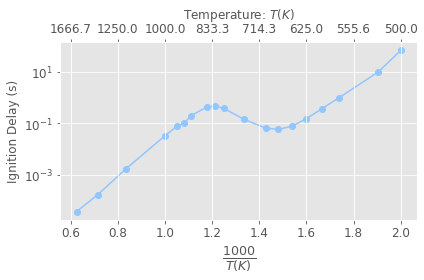

In [132]:
%matplotlib inline
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.autolayout'] = True

plt.style.use('ggplot')
plt.style.use('seaborn-pastel')

print('\n\nThe Semi-log Plot of autoignition delay vs 1000/T for the above range of temperatures is given below:\n')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.semilogy(1000/ignitionDelays['T'], ignitionDelays['ignDelay'], 'o-')
ax.set_ylabel('Ignition Delay (s)')
ax.set_xlabel(r'$\frac{1000}{T (K)}$', fontsize=18)

# Add a second axis on top to plot the temperature for better readability
ax2 = ax.twiny()
ticks = ax.get_xticks()
ax2.set_xticks(ticks)
ax2.set_xticklabels((1000/ticks).round(1))
ax2.set_xlim(ax.get_xlim())
ax2.set_xlabel(r'Temperature: $T(K)$');

<a id='Section3_2_1'><a>
### 3.2.1 - $OH$ Radical as an Autoignition Delay Indicator 

The $OH$ hydroxyl radical is a very good indicator for autoignition delay because of its use in sensitivity analysis. In combustion processes a variety of intermediates are produced, the $OH$ radical being one of them. Due to the presence of an unpaired electron (which makes $OH$ highly reactive), they play a significant role in chain branching reactions, which in part enhances ignition events.

The following branching mechanisms illustrate the production of $OH$ radicals, therefore making it a suitable indicator for ignition:

$$
\begin{align}
RH + O_2 &\rightarrow R + HO_2 \\
\end{align}
$$

Low temperature regime:

$$
\begin{align}
R + O_2 + M &\rightleftharpoons RO_2 + M \\
RO_2 + RH &\rightarrow RO_2H + R \\
RO_2H + M &\rightarrow RO + OH + M \\
\end{align}
$$

Intermediate temperature regime (~700K):

$$
H_2O_2 + M \rightarrow OH + OH + M
$$

It is important to note however, that between the range of low and intermediate temperature regimes, certain intermediate reactions are effected to the point that subsequent chain-branching steps are stopped, thus leading to a shut-off in the overall reaction. This behavior thus explains the negative temperature coefficient that is visible from the plot above.


<a id='Section3_3'><a>
## 3.3 Minimum Flow Rate Required to Prevent Fire

For the code below, the flow rate was manually increased until ignition was no longer visible in the plot and the change in temperature in the final stage of the simulation reached equilibrium.
<br>

Temperature rise: 6.2745 K

initial fuel concentration: 18740.630 vppm
final fuel concentration: 18230.883 vppm

initial CO2 concentration: 0.000 vppm
final CO2 concentration: 0.080 vppm

The required minimun flow rate is: 21.380 m^3/s


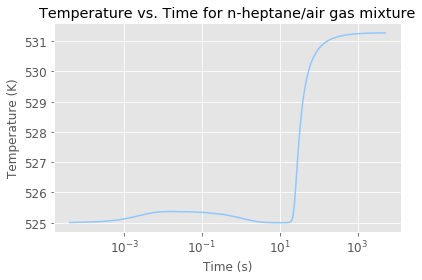

In [202]:
########____________ ambient conditions_____________#######
room_T = 525 #K Initial temperature to be used after sudden increase in temperature due to stagnation conditions
room_P = ct.one_atm 
room_V = 24  # m^3, room dimensions
flow= 21.38 #m^3/s

# instrument parameters

# "conductance" of the pressure valve and will determine its efficiency in 
# holding the reactor pressure to the desired conditions. 
pressureValveCoefficient = 0.05

# This parameter will allow you to decide if the valve's conductance is acceptable. If there
# is a pressure rise in the reactor beyond this tolerance, you will get a warning
maxPressureRiseAllowed = 0.01

# Simulation termination criterion
maxSimulationTime = 5000  # seconds

########_________Gas, Reservoirs, and Reactor____________#######

# Initializing Gas Mixture
gas = ct.Solution('seiser1.cti')
gas.set_equivalence_ratio(1.0, 'nc7h16:1','O2:1.0, N2:3.76') #stoichiometric
gas.TP = room_T, room_P

#reservoir for gas mixture 
gas_mix = ct.Reservoir(gas)

#exhaust reservoir
exhaust = ct.Reservoir(gas)

# Reactor
#room is modelled as a PSR
React = ct.IdealGasReactor(gas, energy='on', volume=room_V)
residenceTime = room_V/flow

# Mass flow controller for gas mixture
massFlowController = ct.MassFlowController(upstream=gas_mix,
                                           downstream=React,
                                           mdot=React.mass/residenceTime)

pressureRegulator = ct.Valve(upstream=React,
                             downstream=exhaust,
                             K=pressureValveCoefficient)

reactorNetwork = ct.ReactorNet([React])

# Now compile a list of all variables for which we will store data
columnNames = [React.component_name(item) for item in range(React.n_vars)]
columnNames = ['pressure'] + columnNames

# Use the above list to create a DataFrame
timeHistory = pd.DataFrame(columns=columnNames)

# Start the stopwatch
tic = time.time()

# Set simulation start time to zero
t = 0
counter = 1

#
X_n_hept_init = React.thermo['NC7H16'].X*1e6
X_C02_init = React.thermo['CO2'].X*1e6

#run simulation
while t < maxSimulationTime:
    t = reactorNetwork.step()

    # We will store only every 5th value. Remember, we have 1200+ species, so there will be
    # 1200 columns for us to work with
    if(counter%5 == 0):
        # Extract the state of the reactor
        state = np.hstack([React.thermo.P, React.mass, 
                   React.volume, React.T, React.thermo.X])
        
        # Update the dataframe
        timeHistory.loc[t] = state
    
    counter += 1

# Stop the stopwatch
toc = time.time()

# We now check to see if the pressure rise during the simulation, a.k.a the pressure valve
# was okay
pressureDifferential = timeHistory['pressure'].max()-timeHistory['pressure'].min()
if(abs(pressureDifferential/ct.one_atm) > maxPressureRiseAllowed):
    print("WARNING: Non-trivial pressure rise in the reactor. Adjust K value in valve")

plt.figure()
plt.semilogx(timeHistory.index, timeHistory.temperature)
plt.grid(True)
plt.title('Temperature vs. Time for n-heptane/air gas mixture')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)');

T_final=React.T #K
Temp_change = T_final - room_T #K

X_n_hept_final = React.thermo['nc7h16'].X*1e6
X_C02_final = React.thermo['CO2'].X*1e6

print('Temperature rise: %1.4f K\n' %Temp_change)
print('initial fuel concentration: %3.3f vppm' %X_n_hept_init)
print('final fuel concentration: %3.3f vppm\n' %X_n_hept_final)
print('initial CO2 concentration: %3.3f vppm' %X_C02_init)
print('final CO2 concentration: %3.3f vppm\n' %X_C02_final)
print('The required minimun flow rate is: %3.3f m^3/s' %flow)


Here we see the minimum flow rate required to prevent combustion at these conditions is 21.38 $m^3/s$. There is a small rise in temperature of about 6K and a small increase (0.08 vppm) in the production of CO2. 

At a flow rate of 21.37 $m^3/s$ the temperature rise was found to be 1856.57 K, therefore ignition would occur.

<a id='Conclusion'><a>
# Conclusion:

In this project, different reactor configurations were compared with the aim of analyzing their pollutant emissions. The concentrations of CO and NO for an Equilibrium setup, a Perfectly Stirred Reactor (PSR), and a Rich-burn, Quick-quench, Lean-burn Reactor (RQL) were obtained and compared. Pure methane was used as the fuel throughout the first two parts of this project. Part 3 focused on conditions affecting autoignition events.

In the first part, it was found that CO had higher concentration values for the RQL and PSR compared to NO. CO however had a much lower value than NO at equilibrium conditions. Also, CO and NO had concentration levels from highest lowest in the following respectively: PSR, RQL, Equilibrium ; Equilibrium, PSR, RQL. 

In the second part, an RQL combustor was built and run over a range of equivalence ratios, obtaining the resulting mole fraction of CO and NO for each equivalence ratio. Using a target value of 25 vppm for pollutant emissions, the range of equivalence ratios for which the target values are acheieved in the RQL combustor was determined. The three combustors used in this project were then compared, and the benefits achieved by the RQL combustor were analyzed versus those of equilibrium reactors and PSRs.

In the third part, a fire hazard assessment was conducted for a fuel leak for different scenerios, which included constant airflow, stagnant conditions, and delayed responses in HVAC systems. The possibility of fires and autoignition delay times at various temperatures were also investigated. For worst case conditions assuming a leak with standard airflows, it was determined that a fire was not possible. Autoignition delays were computed for various temperatures which also demonstrated the use of the $OH$ radical as a marker for ignition and the negative temperature coefficient. 